#  Superstore Sales Data Analytics - Project

- 👨‍💻 **Author:** Shivam Kasaudhan  
- 📅 **Date:** May 2025  

Data Prepration

In [2]:
# Importing nessesary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn style for better visuals
sns.set(style ="whitegrid")

In [8]:
# Loading the cleaned dataset

df = pd.read_csv("Superstore.csv" , encoding='ISO-8859-1')

In [9]:
# Checking the shape of the dataset (rows, columns)
print("Data Shape:",df.shape)

Data Shape: (9994, 21)


In [10]:
#checking the first few rows of the dataset
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [11]:
# Summary of the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Preprocessing and Feature Engineering

In [12]:
# Converting "Order Date" column to datetime format

df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
# Extracting Year, Month Name, and Month Number from the Order Date

df['Year'] = df["Order Date"].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Month_num'] = df['Order Date'].dt.month


In [14]:
# Creating a new column for profit margin (Profit / Sales)

df['Profit_Margin']= df['Profit']/df['Sales']

Basic Summary & Grouped Insights

In [15]:
# Total Sales and Profit across the dataset

print('Total_Sales:',df['Sales'].sum())
print('Total_Profit:', df['Profit'].sum())

Total_Sales: 2297200.8603000003
Total_Profit: 286397.0217


In [16]:
# Region-wise Sales and Profit Summary

Region_perf = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
print("\n Sales and Profit by Region: \n" , Region_perf)


 Sales and Profit by Region: 
                Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


In [19]:
# Top 10 Customers by Sales

top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending = False).head(10)
print("\nTop 10 Customers by Sales:\n " , top_customers)


Top 10 Customers by Sales:
  Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


Monthly Sales Trend by Year

In [22]:
# Grouping sales data by Year and Month

monthly_sales = df.groupby(['Year','Month_num', 'Month'])['Sales'].sum().reset_index()

In [23]:
# Sorting data to ensure Jan–Dec order within each year

monthly_sales = monthly_sales.sort_values(by=['Year', 'Month_num'])

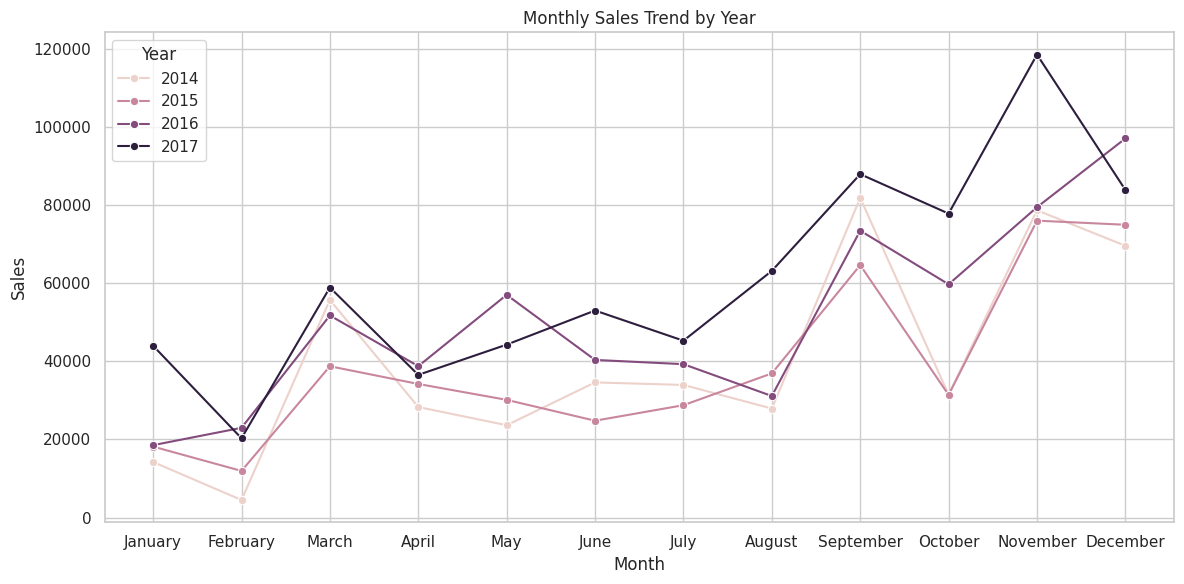

In [29]:
# Ploting Monthly Sales Trend

plt.figure(figsize = (12,6))
sns.lineplot(data = monthly_sales, x = 'Month', y = 'Sales', hue = 'Year', marker = 'o')
plt.title('Monthly Sales Trend by Year')
plt.tight_layout()
plt.show()

Profit by Product Category

In [31]:
# Grouping profit by Category

category_profit = df.groupby('Category')['Profit'].sum().sort_values()

<ipython-input-37-0037935038ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = category_profit.values, x = category_profit.index, palette = 'viridis')


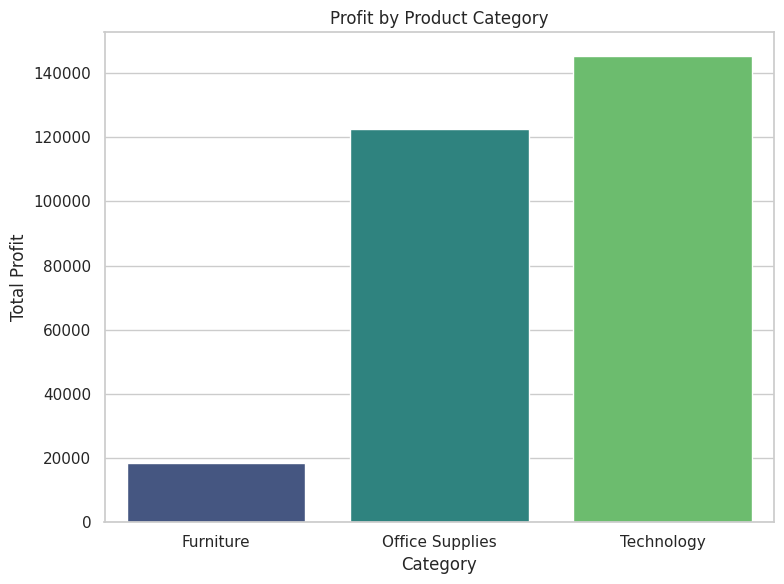

In [37]:
# Bar Plot for Category-wise Profit

plt.figure(figsize = (8,6))
sns.barplot(y = category_profit.values, x = category_profit.index, palette = 'viridis')
plt.title('Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

Profit by Category and Region

In [36]:
# Creating pivot table for heatmap

pivot = df.pivot_table(index = 'Region', columns = 'Category', values = 'Profit', aggfunc = 'sum')

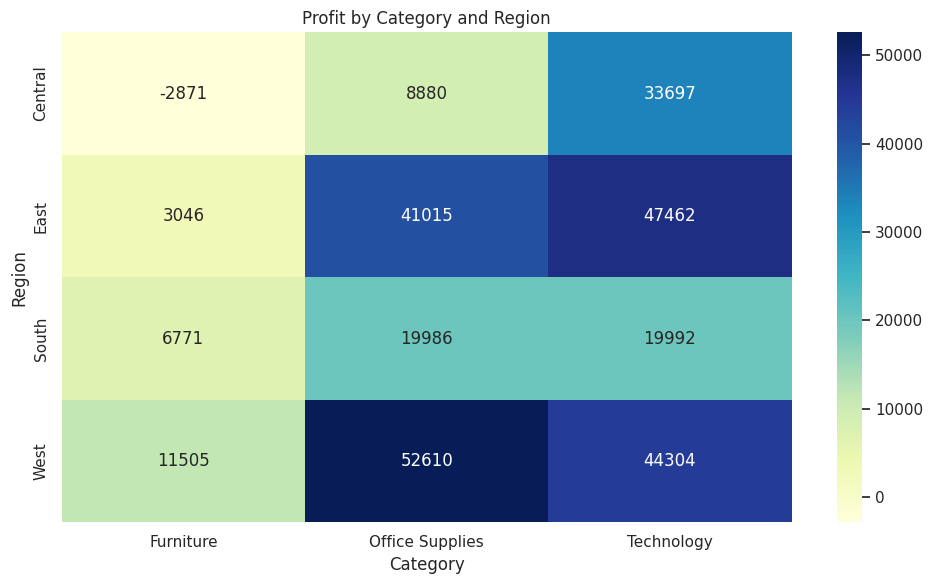

In [48]:
# Ploting the heatmap

plt.figure(figsize = (10,6))
sns.heatmap(pivot, annot = True, cmap = 'YlGnBu', fmt = '.0f')
plt.title('Profit by Category and Region')
plt.tight_layout()
plt.show()